# Chapter 2. End-to-End Machine Learning Project

In [3]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [4]:
housing = pd.read_csv("datasets/housing/housing.csv")
housing_copy = housing.copy()

# Quick Look at the Data Structure

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


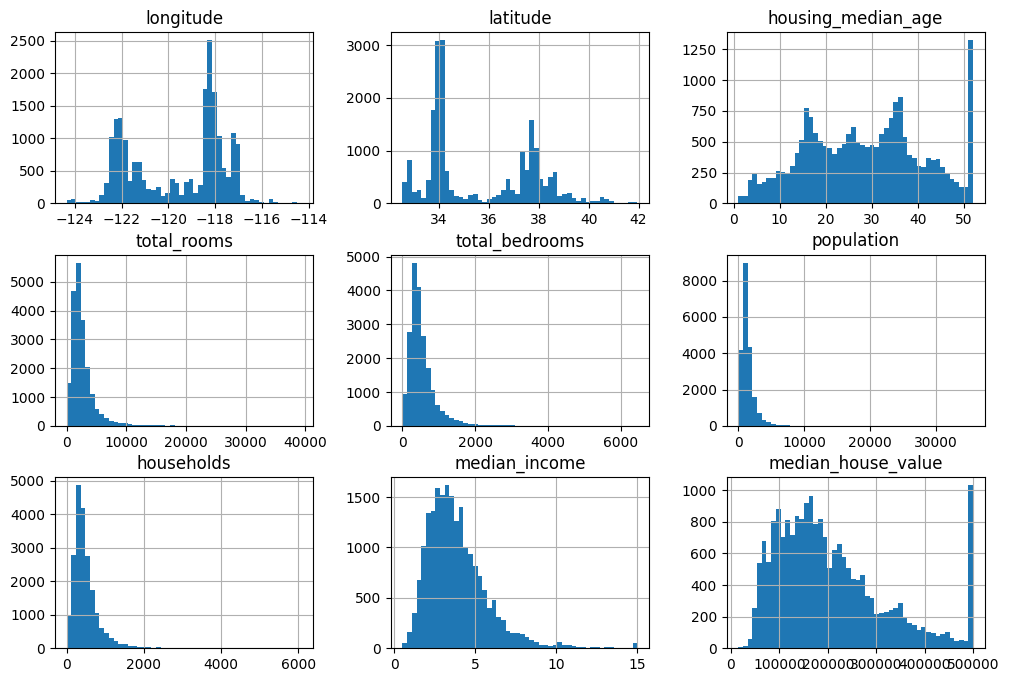

In [9]:
housing.hist(bins=50,figsize=(12,8))
plt.show()

# Create Test and Train Sets

In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [11]:
len(train_set)

16512

In [12]:
len(test_set)

4128

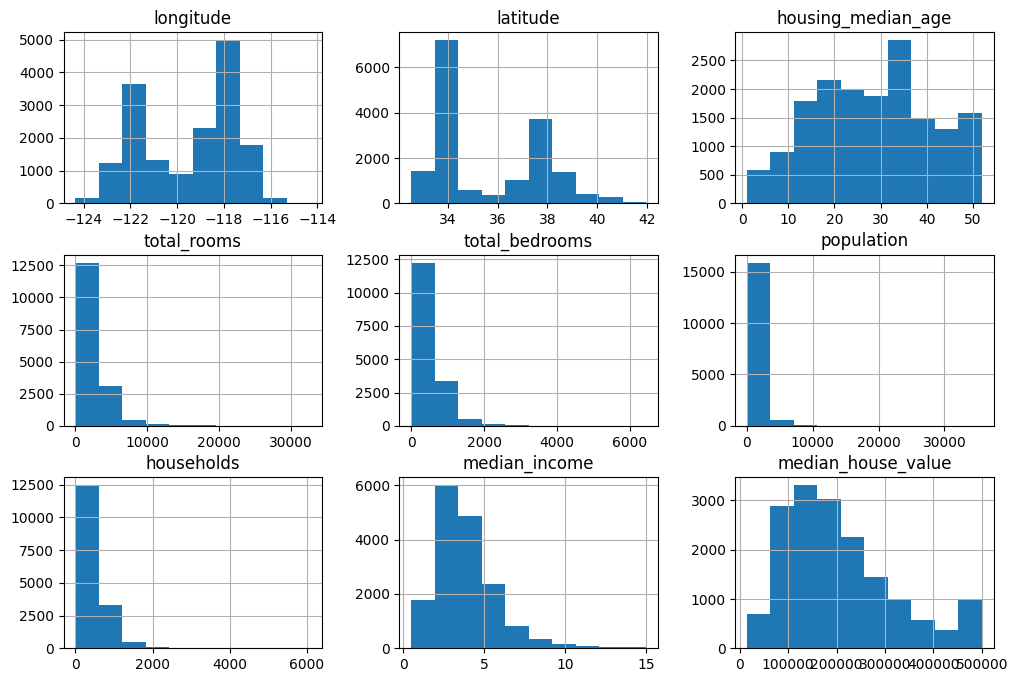

In [13]:
train_set.hist(figsize=(12,8))
plt.show()

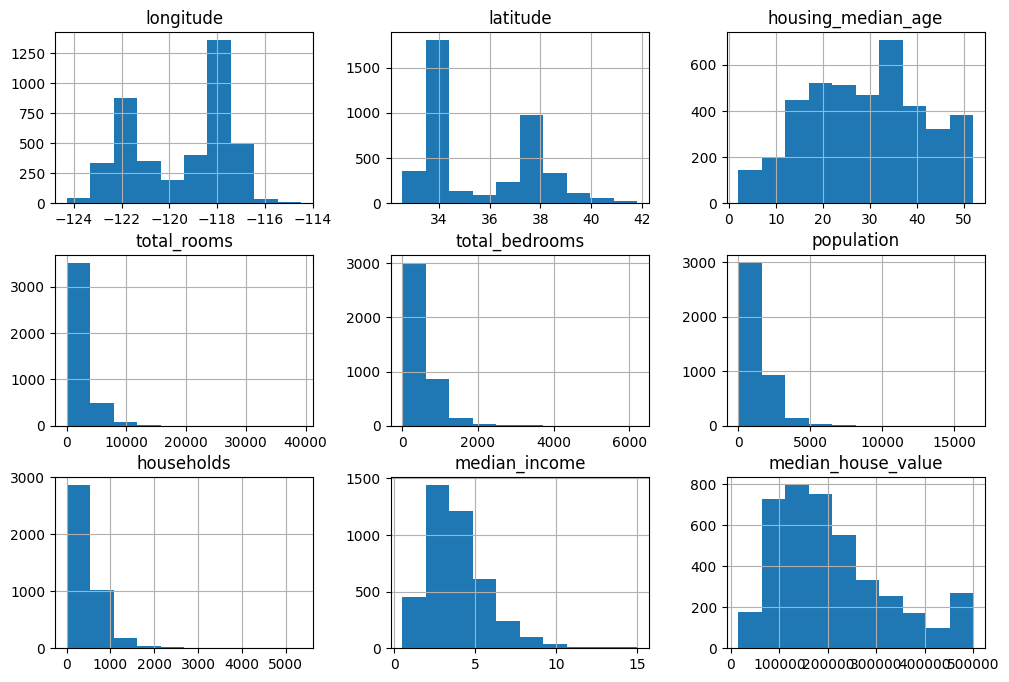

In [14]:
test_set.hist(figsize=(12,8))
plt.show()

In [15]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [16]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [17]:
housing["income_category"] = pd.cut(housing["median_income"],bins=[0.,1.5,3.0,4.5,6.,np.inf],
                               labels=[1, 2, 3, 4, 5])

In [18]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


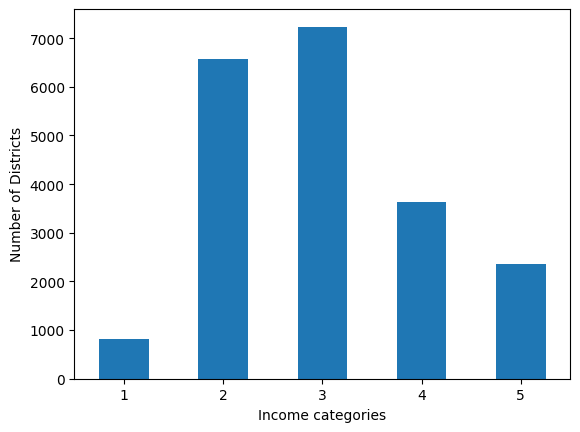

In [19]:
housing['income_category'].value_counts().sort_index().plot.bar(rot=0)

plt.xlabel("Income categories")
plt.ylabel("Number of Districts")
plt.show()

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2,
                                  random_state=42)
strat_splits = []

for train_index, test_index in splitter.split(housing,housing['income_category']):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_test_set_n, strat_test_set_n])

In [21]:
print(splitter.split(housing,housing['income_category']))

<generator object BaseShuffleSplit.split at 0x000001C51A0FF440>


In [22]:
strat_train_set, strat_test_set = strat_splits[0]
strat_train_set_1, strat_test_set_1 = strat_splits[1]

In [23]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360,397700.0,<1H OCEAN,5
16821,-118.01,33.89,36.0,1589.0,265.0,804.0,272.0,4.6354,202900.0,<1H OCEAN,4
2900,-118.18,33.74,30.0,5915.0,1750.0,2136.0,1503.0,4.0968,310000.0,NEAR OCEAN,3
7193,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310,314300.0,NEAR OCEAN,3
13928,-122.39,37.78,5.0,1405.0,515.0,725.0,392.0,3.6037,187500.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
12369,-124.16,40.79,46.0,3042.0,597.0,1206.0,541.0,2.1135,90600.0,NEAR OCEAN,2
8707,-119.01,35.39,29.0,1820.0,459.0,1134.0,419.0,1.8289,59400.0,INLAND,2
16634,-123.01,38.67,33.0,914.0,147.0,394.0,132.0,4.6875,246200.0,<1H OCEAN,4
9779,-122.03,37.60,24.0,2077.0,383.0,1488.0,389.0,4.5721,214700.0,NEAR BAY,4


In [24]:
strat_train_set_1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
11734,-122.25,37.87,52.0,609.0,236.0,1349.0,250.0,1.1696,500001.0,NEAR BAY,1
3016,-119.08,35.34,16.0,1535.0,238.0,768.0,236.0,5.4449,118500.0,INLAND,4
19907,-118.17,34.04,43.0,908.0,232.0,1005.0,224.0,1.7500,134000.0,<1H OCEAN,2
18584,-118.08,33.81,21.0,1189.0,281.0,577.0,264.0,3.3155,237500.0,<1H OCEAN,3
13552,-117.13,32.73,52.0,2676.0,557.0,1181.0,537.0,3.6058,213100.0,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
3698,-124.01,40.97,21.0,1513.0,319.0,943.0,301.0,3.5380,102700.0,<1H OCEAN,3
9699,-118.33,34.21,31.0,3190.0,489.0,1362.0,480.0,6.9810,402900.0,<1H OCEAN,5
5264,-118.28,33.97,34.0,2771.0,802.0,2782.0,715.0,1.6652,99000.0,<1H OCEAN,2
9811,-122.33,37.94,43.0,1876.0,389.0,807.0,377.0,3.1571,141600.0,NEAR BAY,3


# Stratified train test dataset using sklearn train_test_split with income_category column stratified

In [25]:
strat_train_set, strat_test_set = train_test_split(housing,
                                                   test_size=0.2,
                                                   stratify=housing["income_category"],
                                                   random_state=42)

In [26]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360,397700.0,<1H OCEAN,5
16821,-118.01,33.89,36.0,1589.0,265.0,804.0,272.0,4.6354,202900.0,<1H OCEAN,4
2900,-118.18,33.74,30.0,5915.0,1750.0,2136.0,1503.0,4.0968,310000.0,NEAR OCEAN,3
7193,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310,314300.0,NEAR OCEAN,3
13928,-122.39,37.78,5.0,1405.0,515.0,725.0,392.0,3.6037,187500.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
12369,-124.16,40.79,46.0,3042.0,597.0,1206.0,541.0,2.1135,90600.0,NEAR OCEAN,2
8707,-119.01,35.39,29.0,1820.0,459.0,1134.0,419.0,1.8289,59400.0,INLAND,2
16634,-123.01,38.67,33.0,914.0,147.0,394.0,132.0,4.6875,246200.0,<1H OCEAN,4
9779,-122.03,37.60,24.0,2077.0,383.0,1488.0,389.0,4.5721,214700.0,NEAR BAY,4


In [27]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY,2
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN,5
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND,2
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND,2
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,500001.0,<1H OCEAN,4
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,88800.0,INLAND,2
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,148800.0,NEAR OCEAN,3
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,500001.0,<1H OCEAN,3


In [28]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [29]:
print(strat_test_set["income_category"].value_counts() / len(strat_test_set))

income_category
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64


In [30]:
len(strat_test_set)

4128

In [31]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [32]:

overall = (housing['income_category'].value_counts() / len(housing))
startified = (strat_test_set['income_category'].value_counts() / len(strat_test_set))
random = (test_set['income_category'].value_counts() / len(test_set))

In [33]:
compare_proportions = pd.DataFrame({
    "Overall_%" : overall,
    "Stratified_%":startified,
    "Random_%":random,
}).sort_index()

In [34]:
compare_proportions.index.name = "Income Category"

In [35]:
compare_proportions

,Overall_%,Stratified_%,Random_%
Income Category,,,
1,0.039826,0.039971,0.042393
2,0.318847,0.318798,0.307413
3,0.350581,0.350533,0.345203
4,0.176308,0.176357,0.184109
5,0.114438,0.114341,0.120882


In [36]:
compare_proportions.index

CategoricalIndex([1, 2, 3, 4, 5], categories=[1, 2, 3, 4, 5], ordered=True, dtype='category', name='Income Category')

In [37]:
compare_proportions["Stratified_%_Error"] = (compare_proportions["Stratified_%"]/compare_proportions["Overall_%"] - 1)
compare_proportions["Random_%_Error"] = (compare_proportions["Random_%"]/compare_proportions["Overall_%"] - 1)

In [38]:
(compare_proportions * 100).round(2)

,Overall_%,Stratified_%,Random_%,Stratified_%_Error,Random_%_Error
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


In [39]:
compare_proportions.round(2)

,Overall_%,Stratified_%,Random_%,Stratified_%_Error,Random_%_Error
Income Category,,,,,
1,0.04,0.04,0.04,0.0,0.06
2,0.32,0.32,0.31,-0.0,-0.04
3,0.35,0.35,0.35,-0.0,-0.02
4,0.18,0.18,0.18,0.0,0.04
5,0.11,0.11,0.12,-0.0,0.06


In [40]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY,2
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN,5
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND,2
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND,2
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,500001.0,<1H OCEAN,4
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,88800.0,INLAND,2
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,148800.0,NEAR OCEAN,3
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,500001.0,<1H OCEAN,3


In [41]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360,397700.0,<1H OCEAN,5
16821,-118.01,33.89,36.0,1589.0,265.0,804.0,272.0,4.6354,202900.0,<1H OCEAN,4
2900,-118.18,33.74,30.0,5915.0,1750.0,2136.0,1503.0,4.0968,310000.0,NEAR OCEAN,3
7193,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310,314300.0,NEAR OCEAN,3
13928,-122.39,37.78,5.0,1405.0,515.0,725.0,392.0,3.6037,187500.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
12369,-124.16,40.79,46.0,3042.0,597.0,1206.0,541.0,2.1135,90600.0,NEAR OCEAN,2
8707,-119.01,35.39,29.0,1820.0,459.0,1134.0,419.0,1.8289,59400.0,INLAND,2
16634,-123.01,38.67,33.0,914.0,147.0,394.0,132.0,4.6875,246200.0,<1H OCEAN,4
9779,-122.03,37.60,24.0,2077.0,383.0,1488.0,389.0,4.5721,214700.0,NEAR BAY,4


In [42]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_category", axis=1, inplace=True)

In [43]:
print(strat_test_set.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [44]:
housing_test_set = strat_test_set.copy()

In [45]:
housing_train = strat_train_set.copy()

# Explore and Visualize the Data to Gain Insights

In [46]:
housing_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

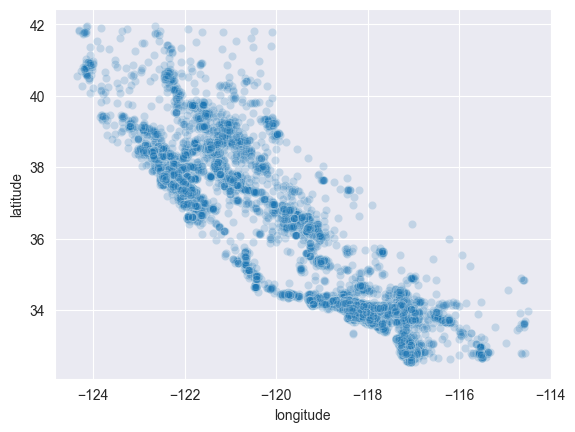

In [47]:
# Visualizing Geographical Data
sns.set_style("darkgrid")
sns.scatterplot(data=housing_train, x="longitude", y="latitude", alpha=0.2)
plt.show()

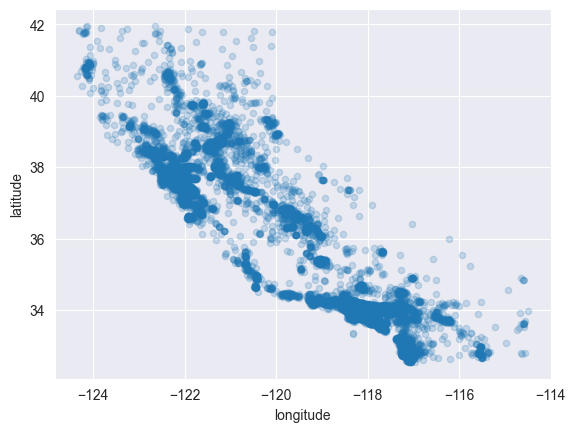

In [48]:
housing_train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)
plt.show()

In [49]:
housing_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

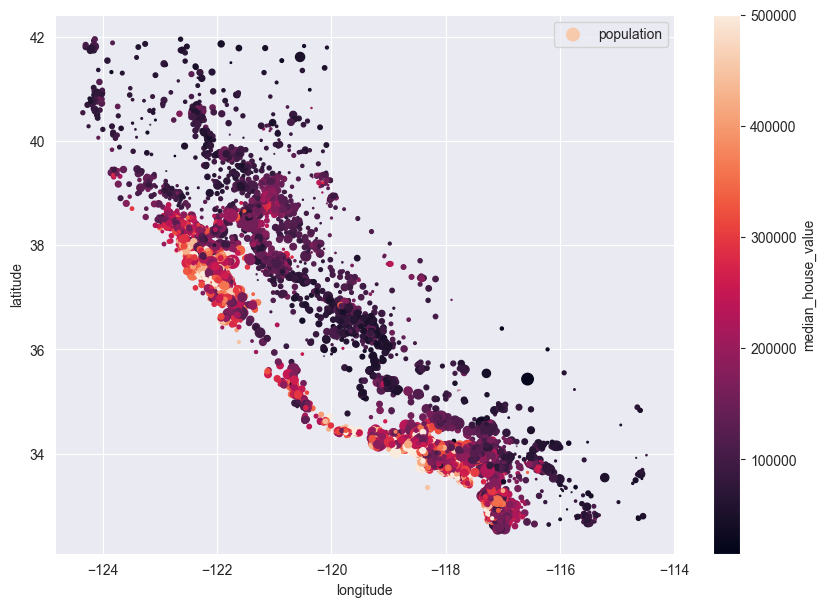

In [50]:
housing_train.plot(kind="scatter",x="longitude", y="latitude",
            grid=True, s=housing_train['population']/100,
            label="population", c="median_house_value",
            colorbar=True,sharex=False,
            figsize=(10,7))
plt.show()


# Look for Correlations

In [51]:
corr_matrix = housing_train.corr(numeric_only=True)

In [52]:
print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64


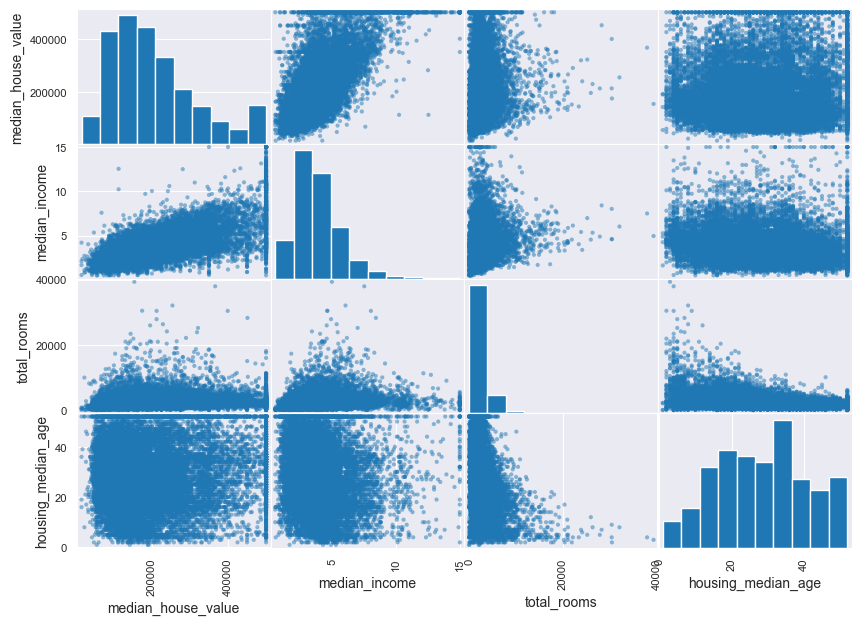

In [53]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value","median_income","total_rooms",
              "housing_median_age"]
scatter_matrix(housing_train[attributes], figsize=(10,7))
plt.show()

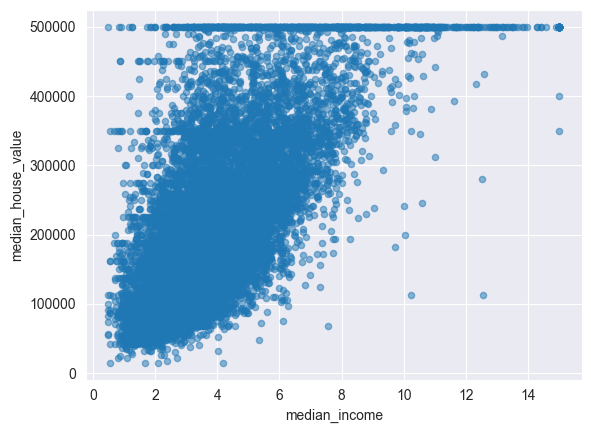

In [54]:
housing_train.plot(kind="scatter", x="median_income",
                   y="median_house_value", alpha=0.5,)
plt.show()

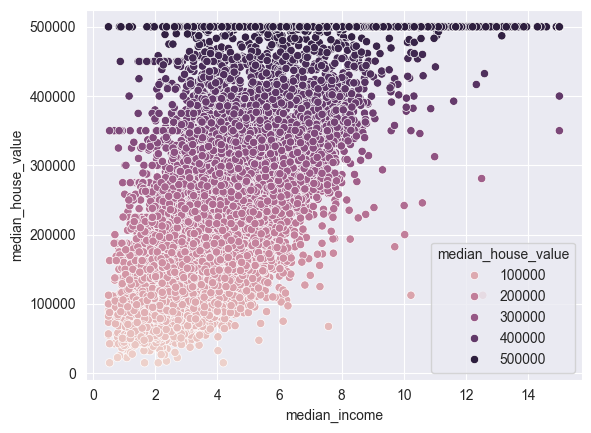

In [55]:
sns.set_style("darkgrid")
sns.scatterplot(data=housing_train, x="median_income",
                y="median_house_value", hue="median_house_value")
plt.show()

# Experiment with Attribute Combinations

In [56]:
housing_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [57]:
housing_train["rooms_per_house"] = housing_train["total_rooms"] / housing_train["households"]
housing_train["bedrooms_ratio"] = housing_train["total_bedrooms"] / housing_train["total_rooms"]
housing_train["people_per_house"] = housing_train["population"] / housing_train["households"]

In [58]:
corr_matrix = housing_train.corr(numeric_only=True)
print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64


# Prepare the Data for Machine Learning Algorithms

In [59]:
housing_train = strat_train_set.drop("median_house_value", axis=1)
housing_train_labels = strat_train_set["median_house_value"].copy()

In [60]:
housing_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN


In [61]:
housing_train_labels

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
           ...   
14207    500001.0
13105     88800.0
19301    148800.0
19121    500001.0
19888    233300.0
Name: median_house_value, Length: 16512, dtype: float64

# Clean the Data

In [62]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_train_num = housing_train.select_dtypes(include=[np.number])

In [63]:
housing_train_num.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
dtype: object

In [64]:
housing_train.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
ocean_proximity        object
dtype: object

In [65]:
imputer.fit(housing_train_num)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [66]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [67]:
housing_train_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [68]:
X = imputer.transform(housing_train_num)

In [69]:
housing_train_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


In [70]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [71]:
housing_train_tr = pd.DataFrame(X, columns=housing_train_num.columns,
                                index=housing_train_num.index)

In [72]:
housing_train_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


In [73]:
housing_train_cat = housing_train[["ocean_proximity"]]

In [74]:
print(housing_train_cat.head(8))

      ocean_proximity
13096        NEAR BAY
14973       <1H OCEAN
3785           INLAND
14689          INLAND
20507      NEAR OCEAN
1286           INLAND
18078       <1H OCEAN
4396         NEAR BAY


In [75]:
housing_train_cat.value_counts()

ocean_proximity
<1H OCEAN          7274
INLAND             5301
NEAR OCEAN         2089
NEAR BAY           1846
ISLAND                2
Name: count, dtype: int64

In [76]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_train_cat_encoded = ordinal_encoder.fit_transform(housing_train_cat)

In [77]:
np.unique(housing_train_cat_encoded)

array([0., 1., 2., 3., 4.])

In [78]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [79]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_train_cat_1hot = cat_encoder.fit_transform(housing_train_cat)

In [80]:
housing_train_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [81]:
housing_train_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], shape=(16512, 5))

In [82]:
housing_train_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [83]:
cat_encoder = OneHotEncoder(sparse_output=False)
housing_train_cat_1hot = cat_encoder.fit_transform(housing_train_cat)

In [84]:
housing_train_cat_1hot

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], shape=(16512, 5))

In [85]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [86]:
df_test = pd.DataFrame({
    "ocean_proximity":["INLAND","NEAR BAY"]
})

In [87]:
df_test

,ocean_proximity
0,INLAND
1,NEAR BAY


In [88]:
print(pd.get_dummies(df_test))

   ocean_proximity_INLAND  ocean_proximity_NEAR BAY
0                    True                     False
1                   False                      True


In [89]:
pd.get_dummies(df_test).astype(int)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,1,0
1,0,1


In [90]:
housing_train_cat_1hot

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], shape=(16512, 5))

In [91]:
cat_encoder.transform(df_test)

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [92]:
# df_get_dummies = pd.DataFrame({'Color': ['Red', 'Blue', 'Green']})
# pd.get_dummies(df_get_dummies)

In [93]:
# df = pd.DataFrame({'Color': ['Red', 'Blue', 'Green']})
# encoder = OneHotEncoder(sparse_output=False)  # sparse=False in older sklearn versions
# encoded = encoder.fit_transform(df[['Color']])
# print(encoded)

In [94]:
df_test_unknown = pd.DataFrame({
    "ocean_proximity" : ["<2H OCEAN", "ISLAND"]
})

In [95]:
df_test_unknown

,ocean_proximity
0,<2H OCEAN
1,ISLAND


In [96]:
pd.get_dummies(df_test_unknown).astype(int)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,1,0
1,0,1


In [97]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [98]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [99]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [100]:
df_outpt = pd.DataFrame(
    cat_encoder.transform(df_test_unknown),
    columns=cat_encoder.get_feature_names_out(),
    index=df_test_unknown.index
)

In [101]:
df_outpt

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


# Feature Scaling and Transformation

In [102]:
housing_train_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


In [103]:
housing_train_cat

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
...,...
14207,<1H OCEAN
13105,INLAND
19301,NEAR OCEAN
19121,<1H OCEAN


In [104]:
housing_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN


In [105]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1,1))
housing_train_num_min_max_scaled = min_max_scaler.fit_transform(housing_train_num)

In [106]:
housing_train_num_min_max_scaled

array([[-0.60851927,  0.11702128,  1.        , ..., -0.80701754,
        -0.61433638, -0.7794789 ],
       [ 0.21095335, -0.66170213,  0.52941176, ..., -0.91866029,
        -0.86708979, -0.22929339],
       [-0.51926978,  0.23617021,  0.25490196, ..., -0.93141946,
        -0.92458466, -0.73336919],
       ...,
       [ 0.47870183, -0.99148936, -0.52941176, ..., -0.65513434,
        -0.71663244, -0.50873781],
       [ 0.20689655, -0.6787234 ,  0.41176471, ..., -0.78873758,
        -0.68751167, -0.49716556],
       [-0.60649087,  0.08723404,  0.68627451, ..., -0.91669734,
        -0.92122457, -0.61608805]], shape=(16512, 8))

In [107]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_train_num_std_scaled = std_scaler.fit_transform(housing_train_num)

In [108]:
housing_train_num_std_scaled

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.13746004,
         1.39481249, -0.93649149],
       [ 0.59639445, -0.702103  ,  0.90762971, ..., -0.69377062,
        -0.37348471,  1.17194198],
       [-1.2030985 ,  1.27611874,  0.35142777, ..., -0.78876841,
        -0.77572662, -0.75978881],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  1.26829911,
         0.67913534,  0.1010487 ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.27356264,
         0.88286825,  0.14539615],
       [-1.41803793,  0.94797769,  1.22545939, ..., -0.67915557,
        -0.75221898, -0.31034135]], shape=(16512, 8))

In [109]:
housing_train_num_min_max_scaled

array([[-0.60851927,  0.11702128,  1.        , ..., -0.80701754,
        -0.61433638, -0.7794789 ],
       [ 0.21095335, -0.66170213,  0.52941176, ..., -0.91866029,
        -0.86708979, -0.22929339],
       [-0.51926978,  0.23617021,  0.25490196, ..., -0.93141946,
        -0.92458466, -0.73336919],
       ...,
       [ 0.47870183, -0.99148936, -0.52941176, ..., -0.65513434,
        -0.71663244, -0.50873781],
       [ 0.20689655, -0.6787234 ,  0.41176471, ..., -0.78873758,
        -0.68751167, -0.49716556],
       [-0.60649087,  0.08723404,  0.68627451, ..., -0.91669734,
        -0.92122457, -0.61608805]], shape=(16512, 8))

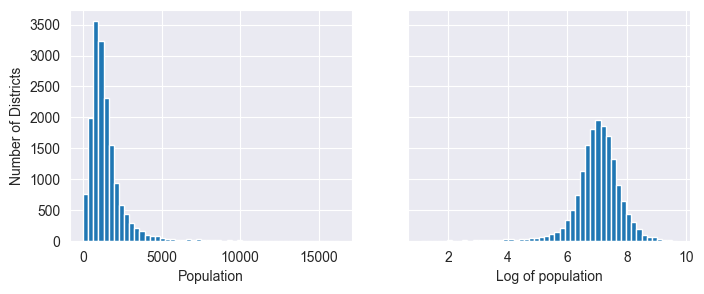

In [110]:
fig, axs = plt.subplots(1, 2, figsize=(8,3), sharey=True)
housing_train["population"].hist(ax=axs[0], bins=50)
housing_train["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of Districts")
plt.show()

In [111]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing_train[["housing_median_age"]], [[35]],
                          gamma=0.1)

In [112]:
type(age_simil_35)

numpy.ndarray

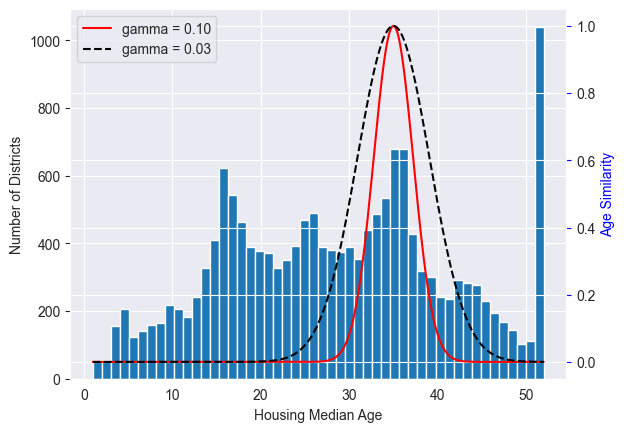

In [113]:
ages = np.linspace(housing_train["housing_median_age"].min(),
                   housing_train["housing_median_age"].max(),
                   500).reshape(-1,1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()
ax1.set_xlabel("Housing Median Age")
ax1.set_ylabel("Number of Districts")
ax1.hist(housing_train["housing_median_age"], bins=50)

ax2 = ax1.twinx()
ax2.plot(ages, rbf1, color="red", label="gamma = 0.10")
ax2.plot(ages, rbf2, color="black", label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', color="blue")
ax2.set_ylabel('Age Similarity', color="blue")
plt.legend(loc="upper left")
plt.show()

In [114]:
type(housing_train_labels)

pandas.core.series.Series

In [115]:
from sklearn.linear_model import LinearRegression

target_scalar = StandardScaler()
scaled_labels = target_scalar.fit_transform(housing_train_labels.to_frame())

model = LinearRegression()
model.fit(housing_train[["median_income"]], scaled_labels)

some_new_data = housing_train[["median_income"]].iloc[:5]

scaled_predictions = model.predict(some_new_data)
predictions = target_scalar.inverse_transform(scaled_predictions)

In [116]:
some_new_data

,median_income
13096,2.0987
14973,6.0876
3785,2.4330
14689,2.2618
20507,3.5292


In [117]:
scaled_predictions

array([[-0.64466228],
       [ 0.80674175],
       [-0.52302364],
       [-0.5853166 ],
       [-0.12415952]])

In [118]:
print(predictions)
print(type(predictions))

[[131997.15275877]
 [299359.35844434]
 [146023.37185694]
 [138840.33653057]
 [192016.61557639]]
<class 'numpy.ndarray'>


In [119]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())

model.fit(housing_train[["median_income"]], housing_train_labels)

predictions = model.predict(some_new_data)

In [120]:
print(predictions)
print(type(predictions))

[131997.15275877 299359.35844434 146023.37185694 138840.33653057
 192016.61557639]
<class 'numpy.ndarray'>


# Custom Transformers

In [121]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing_train[["population"]])

In [122]:
print(log_pop)

       population
13096    7.362645
14973    6.501290
3785     6.331502
14689    7.520235
20507    7.555905
...           ...
14207    6.843750
13105    7.257708
19301    7.942362
19121    7.452982
19888    6.525030

[16512 rows x 1 columns]


In [123]:
type(housing_train[["population"]])

pandas.core.frame.DataFrame

In [124]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(
                                          Y=[[35.]],
                                          gamma=0.1
                                      ))
age_simil_35 = rbf_transformer.transform(housing_train[["housing_median_age"]])

In [125]:
housing_train["housing_median_age"]

13096    52.0
14973    40.0
3785     33.0
14689    17.0
20507    36.0
         ... 
14207    41.0
13105    23.0
19301    13.0
19121    37.0
19888    44.0
Name: housing_median_age, Length: 16512, dtype: float64

In [126]:
age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]], shape=(16512, 1))

In [127]:
san_francisco_coords = 37.7749, -122.41
san_francisco_transformer = FunctionTransformer(
    rbf_kernel,
    kw_args=dict(
        Y=[san_francisco_coords],
        gamma=0.1
    )
)

san_francisco_simil = san_francisco_transformer.transform(
    housing_train[["latitude", "longitude"]]
)

In [128]:
san_francisco_simil

array([[0.999927  ],
       [0.05258419],
       [0.94864161],
       ...,
       [0.00388525],
       [0.05038518],
       [0.99868067]], shape=(16512, 1))

In [129]:
housing_train[["longitude","latitude"]]

,longitude,latitude
13096,-122.42,37.80
14973,-118.38,34.14
3785,-121.98,38.36
14689,-117.11,33.75
20507,-118.15,33.77
...,...,...
14207,-118.40,33.86
13105,-119.31,36.32
19301,-117.06,32.59
19121,-118.40,34.06


In [130]:
ratio_transformer = FunctionTransformer(
    lambda X: X[:, [0]] / X[:,[1]]
)

ratio_transformer.transform(
    np.array([
        [1., 2.],
        [3., 4.]
    ])
)

array([[0.5 ],
       [0.75]])

In [131]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalarClone(BaseEstimator, TransformerMixin):

    def __init__(self, with_mean=True):
        self.with_mean = with_mean

    def fit(self, X, y=None):
        X = check_array(X)
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]

        return self
    
    def transform(self, X):
        check_is_fitted(self, X)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        
        if self.with_mean:
            X = X - self.mean_
        
        return X / self.scale_

In [132]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    
    def __init__(self,
                n_clusters = 10,
                gamma = 1.0,
                random_state=None):
        
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):

        self.kmeans_ = KMeans(self.n_clusters,
                              random_state=self.random_state)
        
        self.kmeans_.fit(X, sample_weight=sample_weight)

        return self
    
    def transform(self, X):

        return rbf_kernel(X, self.kmeans_.cluster_centers_,
                          gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):

        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]
    
    

In [133]:
cluster_simil = ClusterSimilarity(
    n_clusters=10,
    gamma=1.,
    random_state=42
)

similarities = cluster_simil.fit_transform(
    housing_train[["latitude", "longitude"]],
    sample_weight=housing_train_labels
)

In [134]:
housing_train_labels

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
           ...   
14207    500001.0
13105     88800.0
19301    148800.0
19121    500001.0
19888    233300.0
Name: median_house_value, Length: 16512, dtype: float64

In [135]:
similarities[:3].round(2)

array([[0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.13, 0.55, 0.  , 0.56],
       [0.64, 0.  , 0.11, 0.04, 0.  , 0.  , 0.  , 0.  , 0.99, 0.  ],
       [0.  , 0.65, 0.  , 0.  , 0.01, 0.  , 0.49, 0.59, 0.  , 0.28]])

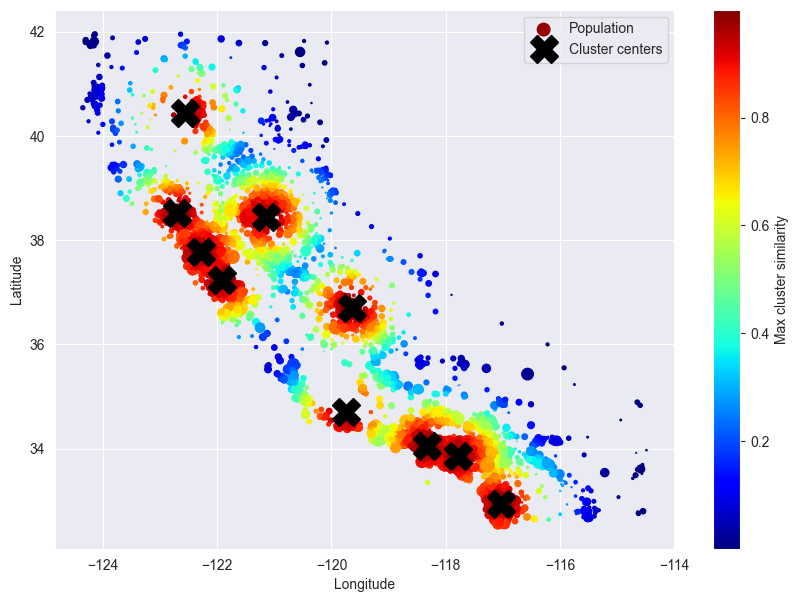

In [136]:
housing_renamed = housing_train.rename(
    columns={
        "latitude":"Latitude",
        "longitude":"Longitude",
        "population":"Population",
        "median_house_value":"Median House Value (USD)"
    }
)

housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(
    kind="scatter",x="Longitude",y="Latitude",
    grid=True,s=housing_renamed["Population"] / 100,
    label="Population",c="Max cluster similarity",
    cmap="jet", colorbar=True,
    legend=True, sharex=False, figsize=(10,7)
)

plt.plot(cluster_simil.kmeans_.cluster_centers_[:,1],
         cluster_simil.kmeans_.cluster_centers_[:,0],
         linestyle="", color="black", marker="X",
         markersize=20, label="Cluster centers")

plt.legend(loc="upper right")
plt.show()
         

# Transformation Pipelines

In [137]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [138]:
num_pipeline

,steps,"[('impute', ...), ('standardize', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [139]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                             StandardScaler())

In [140]:
num_pipeline

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [141]:
housing_train_num_prepared = num_pipeline.fit_transform(
    housing_train_num
)

In [142]:
housing_train_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [143]:
df_housing_train_num_prepared = pd.DataFrame(
    housing_train_num_prepared,
    columns=num_pipeline.get_feature_names_out(),
    index=housing_train_num.index
)

In [144]:
num_pipeline['simpleimputer']

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [145]:
from sklearn.compose import ColumnTransformer

num_attributes = ["longitude", "latitude", "housing_median_age",
                  "total_rooms", "total_bedrooms", "population",
                  "households", "median_income"]

cat_attributes = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attributes),
    ("cat", cat_pipeline, cat_attributes),
])

In [146]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [147]:
housing_train_prepared = preprocessing.fit_transform(housing_train)

In [148]:
preprocessing.get_feature_names_out()

array(['pipeline-1__longitude', 'pipeline-1__latitude',
       'pipeline-1__housing_median_age', 'pipeline-1__total_rooms',
       'pipeline-1__total_bedrooms', 'pipeline-1__population',
       'pipeline-1__households', 'pipeline-1__median_income',
       'pipeline-2__ocean_proximity_<1H OCEAN',
       'pipeline-2__ocean_proximity_INLAND',
       'pipeline-2__ocean_proximity_ISLAND',
       'pipeline-2__ocean_proximity_NEAR BAY',
       'pipeline-2__ocean_proximity_NEAR OCEAN'], dtype=object)

In [149]:
housing_train_prepared_df = pd.DataFrame(
    housing_train_prepared,
    columns = preprocessing.get_feature_names_out(),
    index = housing_train.index
)

In [150]:
housing_train_prepared_df

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,0.0,1.0,0.0,0.0,0.0
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,0.0,1.0,0.0,0.0,0.0
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041,1.0,0.0,0.0,0.0,0.0
13105,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630,0.0,1.0,0.0,0.0,0.0
19301,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049,0.0,0.0,0.0,0.0,1.0
19121,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396,1.0,0.0,0.0,0.0,0.0


In [151]:
type(preprocessing)

sklearn.compose._column_transformer.ColumnTransformer

In [152]:
def column_ratio(X):
    return X[:,[0]] / X[:,[1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio,
                            feature_names_out=ratio_name),
                            StandardScaler()
    )

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log,feature_names_out="one-to-one"),
    StandardScaler()
)

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1,random_state=42)

default_num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms","total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms","households"]),
    ("people_per_house", ratio_pipeline(), ["population","households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms","population","households","median_income"]),
    ("geo", cluster_simil, ["latitude","longitude"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),],
    remainder=default_num_pipeline)

In [153]:
housing_train_prepared = preprocessing.fit_transform(housing_train)

In [154]:
housing_train_prepared.shape

(16512, 24)

In [155]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

# Select and Train a Model

In [156]:
preprocessing

,transformers,"[('bedrooms', ...), ('rooms_per_house', ...), ...]"
,remainder,Pipeline(step...ardScaler())])
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


# Train and Evaluate on the Training Set

In [157]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing,LinearRegression())

lin_reg.fit(housing_train, housing_train_labels)

,steps,"[('columntransformer', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('bedrooms', ...), ('rooms_per_house', ...), ...]"
,remainder,Pipeline(step...ardScaler())])
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [158]:
housing_predictions = lin_reg.predict(housing_train)

In [159]:
housing_predictions[:5].round(2)

array([245970.16, 372738.07, 135706.8 ,  91440.93, 330873.54])

In [160]:
housing_train_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

In [161]:
from sklearn.metrics import root_mean_squared_error

lin_rmse = root_mean_squared_error(
    housing_train_labels,housing_predictions)

In [162]:
lin_rmse

68972.88910758533

In [163]:
from sklearn.tree import DecisionTreeRegressor

decission_tree_reg = make_pipeline(
    preprocessing,
    DecisionTreeRegressor(random_state=42)
)
decission_tree_reg.fit(housing_train, housing_train_labels)

,steps,"[('columntransformer', ...), ('decisiontreeregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('bedrooms', ...), ('rooms_per_house', ...), ...]"
,remainder,Pipeline(step...ardScaler())])
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [164]:
housing_predictions = decission_tree_reg.predict(housing_train)

In [165]:
tree_rmse = root_mean_squared_error(housing_train_labels,housing_predictions)

In [166]:
tree_rmse

0.0

# Better Evaluation Using Cross-Validation

In [167]:
from sklearn.model_selection import cross_val_score

tree_rmses = cross_val_score(
    decission_tree_reg,housing_train,housing_train_labels,
    scoring="neg_root_mean_squared_error",cv=10
)


In [168]:
type(tree_rmses)

numpy.ndarray

In [169]:
print(pd.Series(-tree_rmses).describe())

count       10.000000
mean     66573.734600
std       1103.402323
min      64607.896046
25%      66204.731788
50%      66388.272499
75%      66826.257468
max      68532.210664
dtype: float64


In [170]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))

forest_rmses = -cross_val_score(forest_reg,housing_train,housing_train_labels,
                                scoring="neg_root_mean_squared_error",
                                cv=10)

In [171]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     47038.092799
std       1021.491757
min      45495.976649
25%      46510.418013
50%      47118.719249
75%      47480.519175
max      49140.832210
dtype: float64

# Fine-Tune the Model

In [172]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42))
])

param_grid = [
    {"preprocessing__geo__n_clusters":[5, 8, 10],
     "random_forest__max_features": [4, 6, 8]},
    {"preprocessing__geo__n_clusters":[10, 15],
     "random_forest__max_features": [6, 8, 10]},
]

grid_search = GridSearchCV(
    full_pipeline, param_grid, cv=3,
    scoring="neg_root_mean_squared_error"
)

grid_search.fit(housing_train,housing_train_labels)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"[{'preprocessing__geo__n_clusters': [5, 8, ...], 'random_forest__max_features': [4, 6, ...]}, {'preprocessing__geo__n_clusters': [10, 15], 'random_forest__max_features': [6, 8, ...]}]"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('bedrooms', ...), ('rooms_per_house', ...), ...]"


In [173]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [174]:
cv_res = pd.DataFrame(grid_search.cv_results_)

In [175]:
cv_res.sort_values(by="mean_test_score",ascending=False,inplace=True)

In [176]:
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,7.899039,0.093993,0.160490,0.009983,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",-42725.423800,-43708.197434,-44334.935606,-43589.518946,662.417543,1
13,13.493979,1.851136,0.248004,0.052960,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",-43486.175916,-43819.842374,-44899.968680,-44068.662323,603.399271,2
6,5.692472,0.316609,0.159916,0.002795,10,4,"{'preprocessing__geo__n_clusters': 10, 'random...",-43797.854175,-44036.240246,-44960.694004,-44264.929475,501.513170,3
9,7.760654,0.391209,0.157138,0.004693,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-43709.661050,-44163.463178,-44966.539107,-44279.887778,519.680433,4
7,7.758077,0.071965,0.162135,0.002195,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-43709.661050,-44163.463178,-44966.539107,-44279.887778,519.680433,4


# Randomized Search

In [177]:
from sklearn.pipeline import Pipeline
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42))
])

In [178]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'preprocessing__geo__n_clusters': randint(low=3,high=50),
    'random_forest__max_features': randint(low=2,high=20)
}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs,
    n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42
)

rnd_search.fit(housing_train, housing_train_labels)

,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'preprocessing__geo__n_clusters': <scipy.stats....001C51A31A660>, 'random_forest__max_features': <scipy.stats....001C51EB791D0>}"
,n_iter,10
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [179]:
print(rnd_search)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
   

In [180]:
final_model = rnd_search.best_estimator_

In [181]:
type(final_model)

sklearn.pipeline.Pipeline

In [182]:
print(final_model)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000001C...
                                                                    n_clusters=45,
                                                                

In [183]:
feature_importances = final_model["random_forest"].feature_importances_

In [184]:
type(feature_importances)

numpy.ndarray

In [185]:
feature_importances.round(2)

array([0.07, 0.05, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.01, 0.02, 0.01,
       0.01, 0.01, 0.  , 0.01, 0.02, 0.01, 0.02, 0.01, 0.  , 0.01, 0.02,
       0.01, 0.01, 0.01, 0.  , 0.02, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01,
       0.03, 0.01, 0.01, 0.01, 0.01, 0.04, 0.01, 0.02, 0.01, 0.02, 0.01,
       0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.07,
       0.  , 0.  , 0.  , 0.01])

In [186]:
sorted(zip(feature_importances,
           final_model['preprocessing'].get_feature_names_out()),
           reverse=True)

[(np.float64(0.18599734460509473), 'log__median_income'),
 (np.float64(0.07338850855844488), 'cat__ocean_proximity_INLAND'),
 (np.float64(0.06556941990883974), 'bedrooms__ratio'),
 (np.float64(0.05364871007672531), 'rooms_per_house__ratio'),
 (np.float64(0.04598870861894748), 'people_per_house__ratio'),
 (np.float64(0.04175269214442519), 'geo__Cluster 30 similarity'),
 (np.float64(0.025976797232869674), 'geo__Cluster 25 similarity'),
 (np.float64(0.023595895886342252), 'geo__Cluster 36 similarity'),
 (np.float64(0.02021056221732893), 'geo__Cluster 9 similarity'),
 (np.float64(0.018606917076661445), 'geo__Cluster 34 similarity'),
 (np.float64(0.01813798837462886), 'geo__Cluster 37 similarity'),
 (np.float64(0.01740435316632674), 'geo__Cluster 18 similarity'),
 (np.float64(0.01677838614384489), 'geo__Cluster 1 similarity'),
 (np.float64(0.015459009666188978), 'geo__Cluster 7 similarity'),
 (np.float64(0.015325731028175922), 'geo__Cluster 32 similarity'),
 (np.float64(0.015073772015038346

In [187]:
X_test = housing_test_set.drop("median_house_value", axis=1)

y_test = housing_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = root_mean_squared_error(y_test, final_predictions)

print(f"Final Root Mean Squared Error (RMSE) = {final_rmse}")

Final Root Mean Squared Error (RMSE) = 41445.533268606625


In [188]:
from scipy import stats

confidence = 0.95

squared_errors = (final_predictions-y_test)**2

np.sqrt(stats.t.interval(confidence,
                         len(squared_errors)-1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)
                         ))

array([39293.55594722, 43491.1590655 ])

# Save the Best Model

In [190]:
import joblib

# save the model
joblib.dump(final_model, "california_housing_model.pkl")

['california_housing_model.pkl']